In [ ]:
! pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.BRICS import BRICSDecompose
from rdkit.Chem.BRICS import BRICSBuild
import random
from IPython.display import display

In [ ]:
class PolymerGenerationPipeline():
  def __init__(self, random_seed = 99, verbose=False):
    self.random_seed = random_seed
    self.verbose = verbose

  def _BRICS_decompose(self, smiles_list: list):
    break_repo = []
    if self.verbose:
      print(f"[+] Incoming molecules ...")
      display(Draw.MolsToGridImage([Chem.MolFromSmiles(b) for b in smiles_list], molsPerRow=5, subImgSize=(200, 200)))
      print(f"[+] Decomposing the molecules ...")
    for smiles in smiles_list:
      mol = Chem.MolFromSmiles(smiles)
      dec = list(BRICSDecompose(mol))
      break_repo.extend(dec)
    if self.verbose:
      print(f"[+] Decomposed the moleculea ...")
      display(Draw.MolsToGridImage([Chem.MolFromSmiles(b) for b in break_repo], molsPerRow=5, subImgSize=(200, 200)))
    return break_repo


  def _BRICS_build(self, decomposed_list: list):
    mol_list = [Chem.MolFromSmiles(dec) for dec in decomposed_list]
    if self.verbose:
      print(f"[+] Building the molecules ...")
    build = list(BRICSBuild(mol_list))
    random.seed(self.random_seed)
    if self.verbose:
      print(f"[+] Built the molecules ...")
      display(Draw.MolsToGridImage(build, molsPerRow=5, subImgSize=(200, 200)))
    return build

  def generate(self, smiles_list: list):
    decomposed_list = self._BRICS_decompose(smiles_list)
    return self._BRICS_build(decomposed_list)


[+] Incoming molecules ...


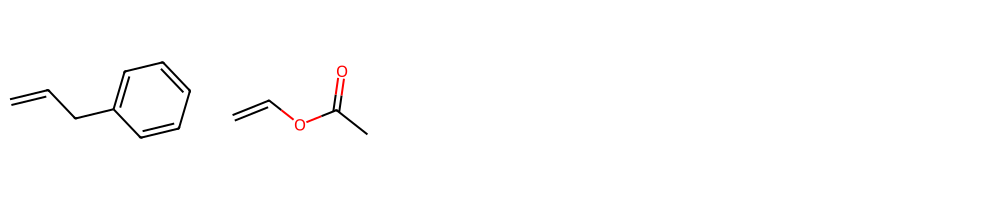

[+] Decomposing the molecules ...
[+] Decomposed the moleculea ...


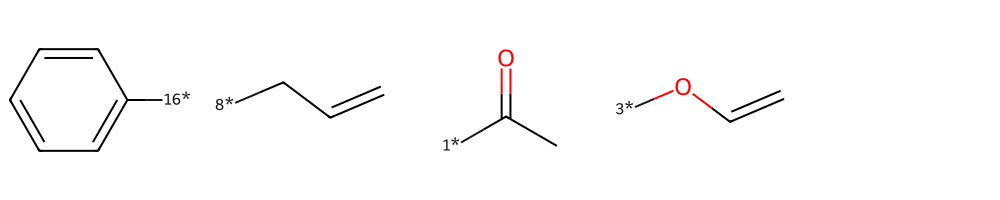

[+] Building the molecules ...
[+] Built the molecules ...


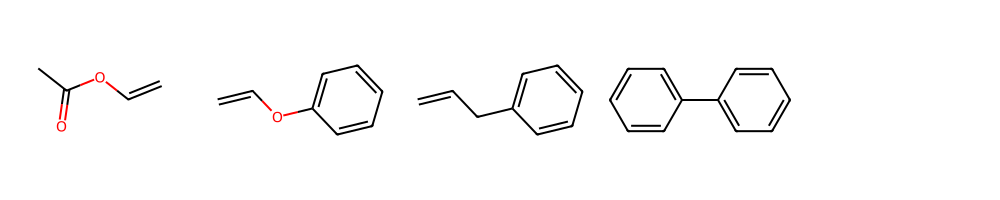

In [ ]:
gen_pipeline = PolymerGenerationPipeline(verbose=True)
gen_pipeline.generate(["C=CCc1ccccc1", "C=COC(C)=O"])

In [ ]:
# getting a sample dataset
! wget "https://zenodo.org/records/12535177/files/monomers.pkl?download=1"

--2024-10-04 05:58:26--  https://zenodo.org/records/12535177/files/monomers.pkl?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 594704702 (567M) [application/octet-stream]
Saving to: ‘monomers.pkl?download=1.2’

 monomers.pkl?downl  53%[=========>          ] 303.76M   169MB/s               ^C


In [ ]:
import joblib

df = joblib.load("/content/monomers.pkl?download=1")

In [ ]:
df

,index,id-smiles
0,0,"(ZINC000001532648, O=C1OC(C(O)CO)C(=O)C1=O)"
1,1,"(ZINC000003861007, O=C1C(=O)C(=O)C(=O)C(=O)C1=O)"
2,2,"(ZINC000003861035, O=c1c(O)c(O)c(=O)c(=O)c1=O)"
3,3,"(ZINC000004342740, O=C1c2n[nH]nc2C(=O)c2n[nH]n..."
4,4,"(ZINC000004786581, O=C1C(=O)C(=O)C(O)C(O)C1=O)"
...,...,...
7754876,7754876,"(CHEMBL58988, N#Cc1c(N)cccc1S(=O)(=O)c1cccc(F)c1)"
7754877,7754877,"(CHEMBL133631, CC1=CC(=O)N(Nc2nc(-c3cccs3)nc3c..."
7754878,7754878,"(CHEMBL4067563, Cc1cc(OCCN(Cc2ccc3c(c2)OCO3)c2..."
7754879,7754879,"(CHEMBL1802599, CS(=O)(=O)Nc1ccc2ccc3ncc(-c4cc..."


In [ ]:
data = df["id-smiles"].values

In [ ]:
data = data[:50]

In [ ]:
len(data)

50

In [ ]:
monomer_dataset = [y for x,y in data]

In [ ]:
monomer_dataset

['O=C1OC(C(O)CO)C(=O)C1=O',
 'O=C1C(=O)C(=O)C(=O)C(=O)C1=O',
 'O=c1c(O)c(O)c(=O)c(=O)c1=O',
 'O=C1c2n[nH]nc2C(=O)c2n[nH]nc21',
 'O=C1C(=O)C(=O)C(O)C(O)C1=O',
 'O=C1CC(=O)NN1',
 'NC=C1C(=O)NC(=O)NC1=O',
 'S=C1NNC(=S)NN1',
 'O=C1NC(=O)C(=CNC2CC2)C(=O)N1',
 'CNC=C1C(=O)NC(=S)NC1=O',
 'COC(=O)CNC=C1C=NNC1=O',
 'CC1NNC(=S)NN1',
 'O=C1C(=O)C(O)C1=O',
 'O=C1C(=O)C2CCC(N2)C1=O',
 'O=c1c2n(c(=O)c3n1CCC=3)CCC=2',
 'O=C1CC(=O)N2C(=O)CC(=O)N12',
 'CN(C)C=C1C(=O)NC(=O)NC1=O',
 'OCC(O)C(O)C(O)C(O)C=S',
 'O=C1NC(=O)C(=CNCCO)C(=O)N1',
 'CN1N=CC(=CNC(N)=O)C1=O',
 'CN1C(=O)C(=CN)C(=O)N(C)C1=O',
 'O=C(CN1CC1)C(=O)CN1CC1',
 'O=C1OC(CC(O)O)C(=O)C1=O',
 'CN1C(=O)NC(=O)C(=CN)C1=O',
 'CCN1C(=O)NC(=O)C(=CN)C1=O',
 'NC(=O)c1cc(O)c(O)c(O)c1',
 'CN(C)C=C1C=NNC1=O',
 'O=C1c2ccccc2C(=O)C1(O)O',
 'CCC1(C)NNC(=S)NN1',
 'O=C1c2nonc2C(=O)c2nonc21',
 'CC(=O)NN1C(=O)CSC1=S',
 'O=C(O)CN1C(=O)CSC1=S',
 'NN1C(=O)CSC1=S',
 'O=CNN1C(=O)CSC1=S',
 'O=C(O)CC1SC(=S)NC1=O',
 'O=C1CCC1=O',
 'CC(C)C1NNC(=S)NN1',
 'NC1=NNC(=O)C1=C1CC

[+] Incoming molecules ...


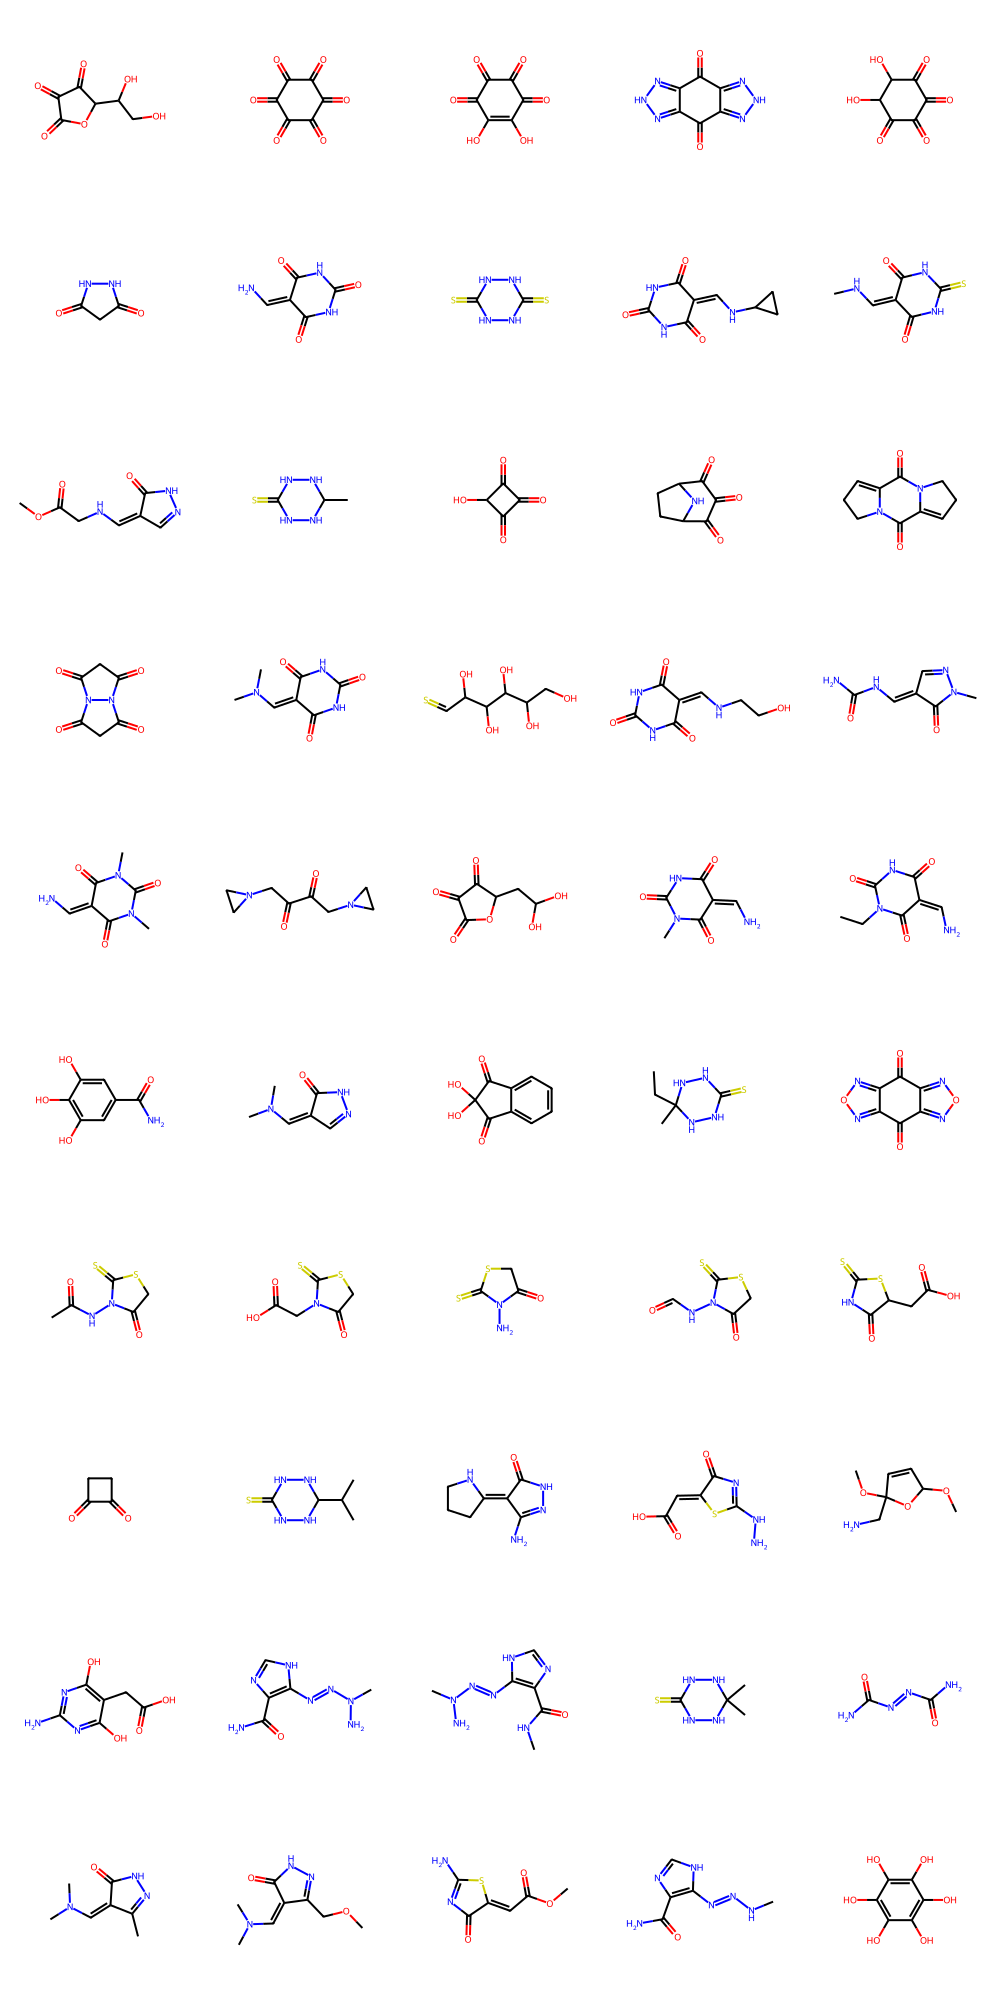

[+] Decomposing the molecules ...
[+] Decomposed the moleculea ...


/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


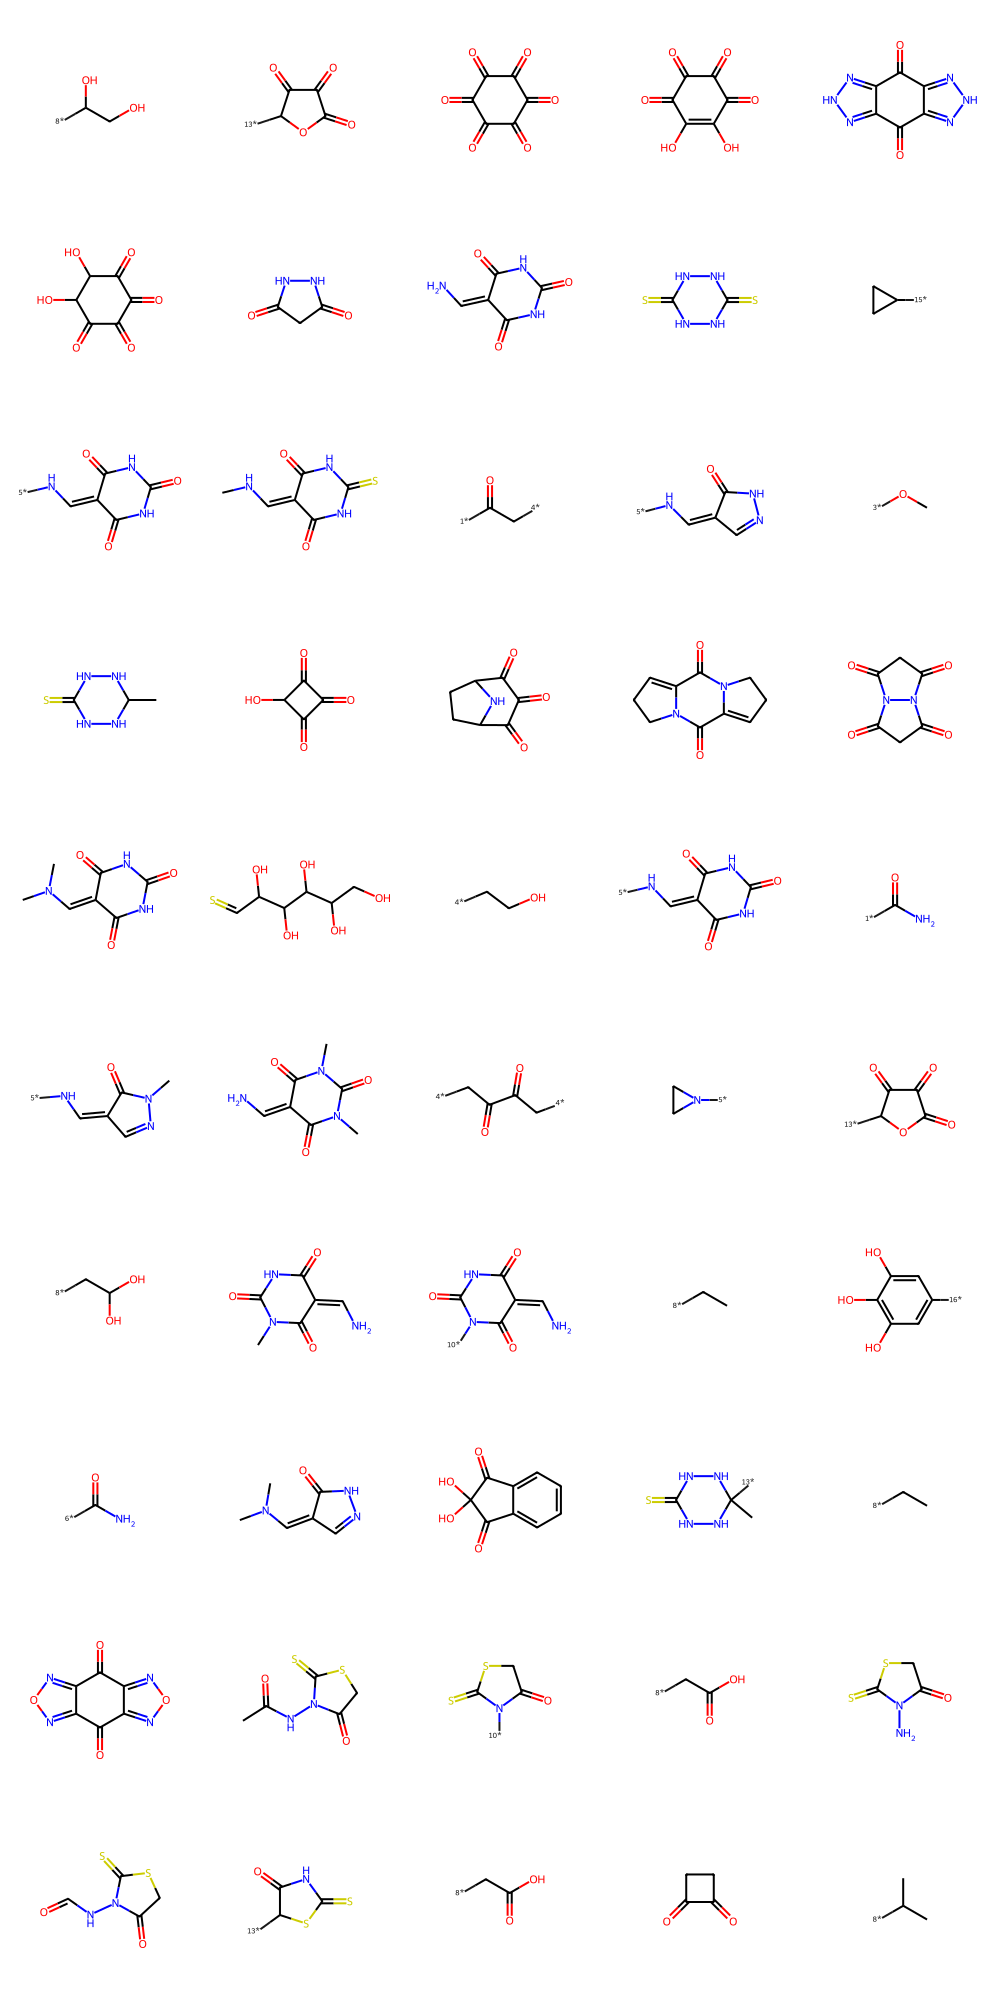

[+] Building the molecules ...
[+] Built the molecules ...


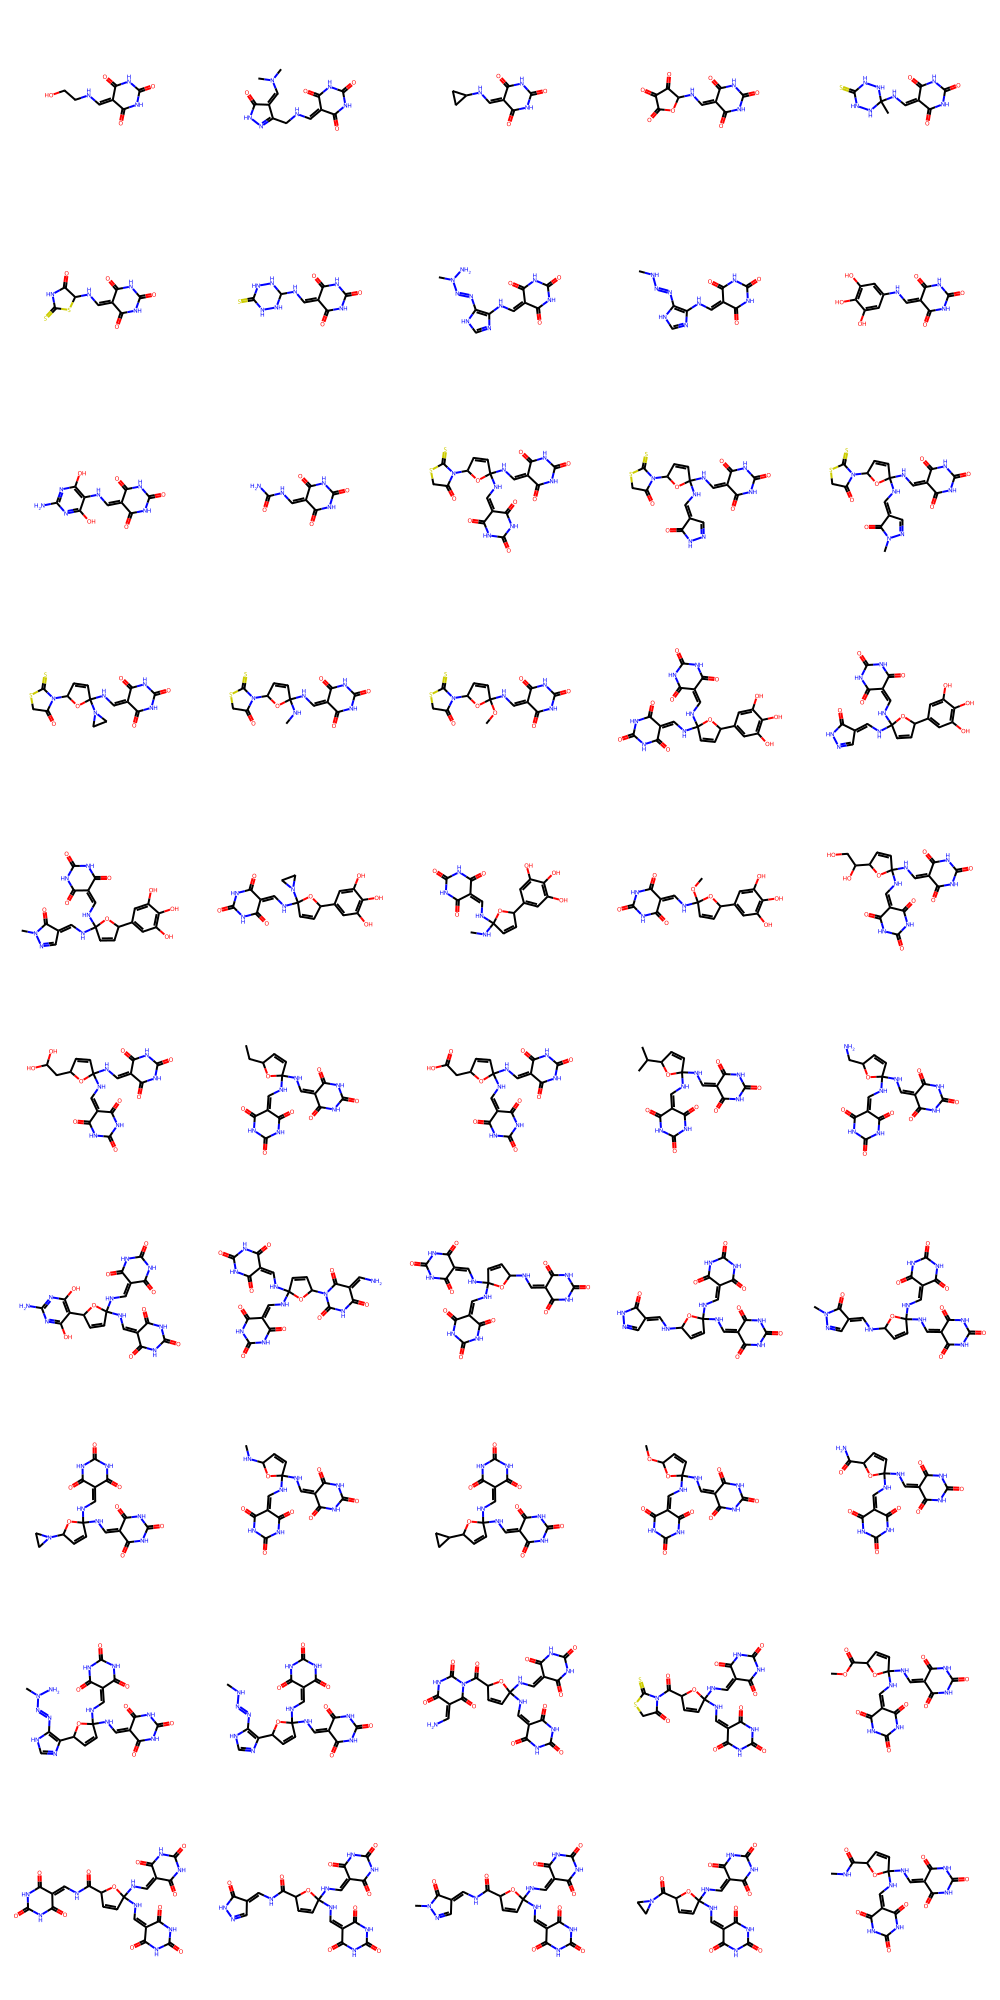

In [ ]:
h_gen_pipeline = PolymerGenerationPipeline(verbose=True)
generated_mols = h_gen_pipeline.generate(monomer_dataset)

In [ ]:
len(generated_mols)

9513

In [ ]:
generated_smiles = [Chem.MolToSmiles(mol) for mol in generated_mols]

In [ ]:
print(generated_smiles)

['O=C1NC(=O)C(=CNCCO)C(=O)N1', 'CN(C)C=C1C(=O)NN=C1CNC=C1C(=O)NC(=O)NC1=O', 'O=C1NC(=O)C(=CNC2CC2)C(=O)N1', 'O=C1NC(=O)C(=CNC2OC(=O)C(=O)C2=O)C(=O)N1', 'CC1(NC=C2C(=O)NC(=O)NC2=O)NNC(=S)NN1', 'O=C1NC(=O)C(=CNC2SC(=S)NC2=O)C(=O)N1', 'O=C1NC(=O)C(=CNC2NNC(=S)NN2)C(=O)N1', 'CN(N)N=Nc1[nH]cnc1NC=C1C(=O)NC(=O)NC1=O', 'CNN=Nc1[nH]cnc1NC=C1C(=O)NC(=O)NC1=O', 'O=C1NC(=O)C(=CNc2cc(O)c(O)c(O)c2)C(=O)N1', 'Nc1nc(O)c(NC=C2C(=O)NC(=O)NC2=O)c(O)n1', 'NC(=O)NC=C1C(=O)NC(=O)NC1=O', 'O=C1NC(=O)C(=CNC2(NC=C3C(=O)NC(=O)NC3=O)C=CC(N3C(=O)CSC3=S)O2)C(=O)N1', 'O=C1NC(=O)C(=CNC2(NC=C3C=NNC3=O)C=CC(N3C(=O)CSC3=S)O2)C(=O)N1', 'CN1N=CC(=CNC2(NC=C3C(=O)NC(=O)NC3=O)C=CC(N3C(=O)CSC3=S)O2)C1=O', 'O=C1NC(=O)C(=CNC2(N3CC3)C=CC(N3C(=O)CSC3=S)O2)C(=O)N1', 'CNC1(NC=C2C(=O)NC(=O)NC2=O)C=CC(N2C(=O)CSC2=S)O1', 'COC1(NC=C2C(=O)NC(=O)NC2=O)C=CC(N2C(=O)CSC2=S)O1', 'O=C1NC(=O)C(=CNC2(NC=C3C(=O)NC(=O)NC3=O)C=CC(c3cc(O)c(O)c(O)c3)O2)C(=O)N1', 'O=C1NC(=O)C(=CNC2(NC=C3C=NNC3=O)C=CC(c3cc(O)c(O)c(O)c3)O2)C(=O)N1', 'CN1N=CC(=CNC2(NC=

In [ ]:
with open("generated_smiles_50.txt", "w") as f:
  for smiles in generated_smiles:
    f.write(f"{smiles}\n")